Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 18, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

The euclidean space is often referred to as cartesian space. The cartesian plane is therefore a 2 dimensional cartesian space.
The euclidean n-space is a coordinate system in which all n-dimensional, real valued tuples lie and the euclidic axioms hold. The shortest path between two vectors for example is a straight line. Angles between vectors also fulfill euclidean properties. 

An euclidean vector can hence be defined as $x \in \mathbb{R}^n$. A 3-dimensional point in space can for example be written as $\begin{pmatrix}
-1.0 \\
1.0\\
0.5
\end{pmatrix}$

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

The norm of a vector in $n$ dimensional Euclidean space is defined as
$||v|| = \sqrt{\sum_{i=1}^{n}{x_i^{2}}}$ and can be interpreted as the length of a vector or its distance to the origin / the zero vector.

Addition as well as subtraction of two vectors in euclidean space are defined as point wise operations.

$$\begin{pmatrix}
x_1\\
\vdots\\
x_n
\end{pmatrix}
+
\begin{pmatrix}
y_1\\
\vdots\\
y_n
\end{pmatrix}
=
\begin{pmatrix}
x_1+y_1\\
\vdots\\
x_n+y_n
\end{pmatrix}$$

(subtraction is defined analogous)

The euclidean distance between two vectors $x$ and $y$ is defined as the norm/length of a vector $(x-y)$ that spans between $x$ and $y$. The

$$\Delta(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^{2}}}$$

The euclidean distance is only one way to measure distance between vectors.
The general form of the norm is the p-norm for which the euclidean distance is the case of the 2-norm.
$${||v||}_p = \sqrt[p]{\sum_{i=1}^{n}{x_i^{p}}}$$
p-norms can be used to measure the length of the vector that spans between the two vectors for which the distance should be measured.

The p-norm can be used to define a variety of distance measurements.

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

The scalar product of two vectors can be expressed by

$$x \cdot y = \sum_{i=1}^{n}{x_i \cdot y_i}$$

In the case of vectors in euclidean space the scalar product can be expressed by

$$x\cdot y = |x||y| \cos{(\theta)}$$
where $\theta$ is the angle between the vectors

The scalar product can therefore be used to find the angle between two vectors by calculating

$$\theta = \arccos{{x \cdot y}\over{|x| |y|}}$$

The scalar product can also be used to calculate the point/length of the projection of a vector onto another.

$$|x| \cos{(\theta)}$$

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast is the magnification of amplitude differences that is used to enhance the separability of spatial areas of different colors or brightness.

One can differentiate between global constrast, the maximal difference between brightness values of the image, and local constrast which can be defined as the average absolute difference of brightness values of neighboring pixels.
Both have advantages and disadvantages.

Low contrast can be caused by over or underexposure during image aquisition as well as natural influences like haze or light refraction effects in the optics.
Low contrast can cause a reduction in dynamic range which causes loss of signal information.
On the other hand a image aquisition technique with very high dynamic range captures an image with very low contrast but still yields all image information.

Contrast can be improved by transfer functions that modifies the brightness value of pixels based on their position in the histogram.


### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

Entropy in the context of information is the average information content of a message. In the case of images it can be calculated via a normalised histogram of the image as it yields the (frequentist) probabilities of all possible 256 values.

To maximise the information content (the entropy in this case) of an image one can use a transfer function that equilises the histogram such that every grey value has the same probability.

The transfer function can be derived from the accumulated probability density function (the normalised histogram in the case of an image).


### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

The optimal transfer function to equilise the probabilities yields real values for the pixels. The values therefore have to be rounded either up or down. This may cause a reduction in entropy.
The tables on the lecture slides show an example of histogram equilisation and the problem of different values mapped to the same value due to rounding.

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

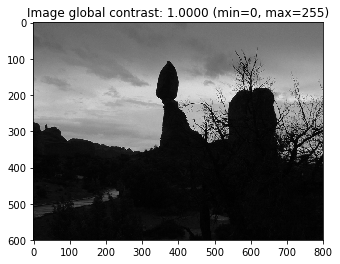

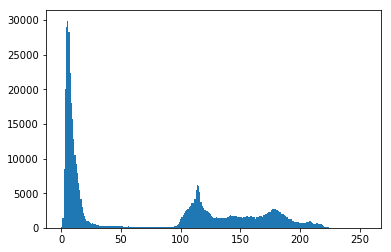

In [215]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        float: The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE
    contrast =  (img.max() - img.min())/np.abs(value_range[1] - value_range[0])

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

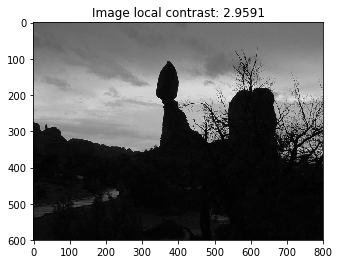

In [269]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import scipy.ndimage as ndi

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        float: The local contrast of the image. 
    """
    # YOUR CODE HERE
    
    #define neighborhood via kernel
    n_kernel = np.array([[0,1,0],
                         [1,0,1],
                         [0,1,0]]).astype(np.float32)
    
    local_mean = ndi.filters.convolve(img.astype(np.float32),n_kernel,mode="constant")
    
    abs_difference = np.abs(img - local_mean*0.25)
    
    return np.mean(abs_difference)
    
    
img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()


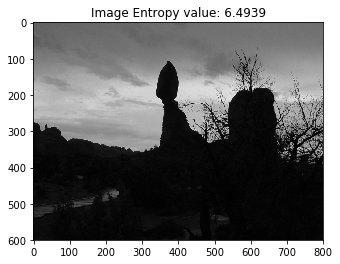

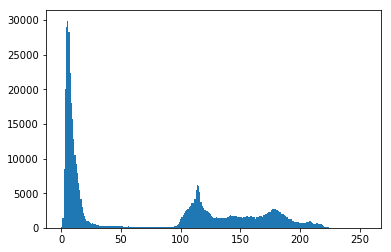

In [260]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        float: The entropy of the image. 
    """
    # YOUR CODE HERE
    
    if img.dtype != np.uint8:
        img = 255.0*img
    
    P = np.histogram(img,256,(0,255))[0]/img.size
    P = P[P!=0] #handle zero probabilities
    return -np.sum(P*np.log2(P))

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

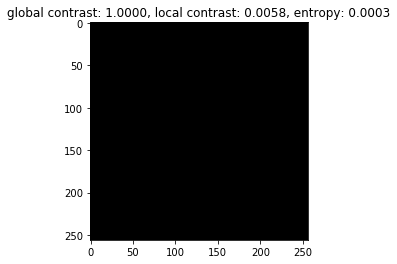

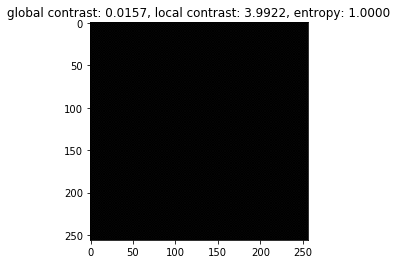

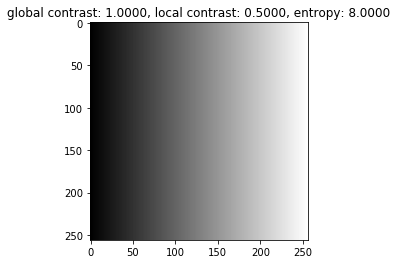

In [270]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)
img1[0,0] = 255
image_info(img1)

img2    = np.zeros((256, 256),np.uint8)
stripes = 2*(np.arange(img2.shape[0])%2)-1
grid    = (np.outer(stripes,-stripes)+1.0)/2.0
img2    = grid*4
img2    = img2.astype(np.uint8)
image_info(img2)

img3 = np.zeros((256, 256),np.uint8)
img3 = (np.ones_like(img1)*np.linspace(0,255,img1.shape[0])).astype(np.uint8)
image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

The main idea of AHE is to focus on local information in order to improve image contrast. While global HE uses the histogram information of the whole image, AHE adapts the value of a pixel based on the histogram of a defined neighborhood.
The advantage of AHE is that it can improve the contrast in images with large areas of different illumination conditions.
The disadvantage is that in areas of low dynamic range (e.g. a sky) AHE tends to amplify noise.


### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

CLAHE is an extension of AHE that aims to solve AHEs main drawback states in a).
CLAHE adapts the value of pixels based on the local histogram information but scales the contrast only up to a predefined maximum. 

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

The computation of AHE scales quadratically in both image and neighborhood size and is therefore very demanding.
The interpolation scheme works by approximating the high resolution image by a linearily interpolated low resolution image. The AHE then uses the average information of the four surrounding superpixels to perform the AHE.
It is a valid approximation as the low resolution image is an approximation of the original image.
The runtime is reduced drastically since the information of the superpixels only have to be computed once and are reused by many pixels. The number of computational steps for the histogram is therefore reduced to a constant in the case of a fixed tiling into e.g. 8x8 blocks.

Another efficient version of AHE is the sliding window AHE (SWAHE).
SWAHE increments the local window always only 1 pixel horizontally or vertically. The local histogram therefore changes only in the values of the new row/collum and the row/collum that leaves the window. For each histogram update there are only $2k$ updates in contrast to $k^2$.

These two techniques may also be combined.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

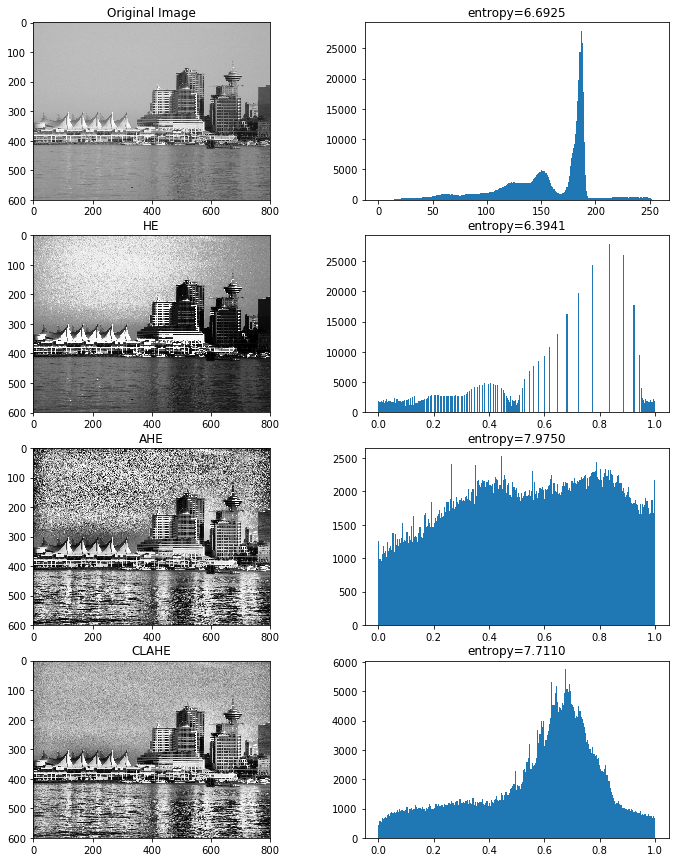

In [261]:
%matplotlib inline
# YOUR CODE HERE
from imageio import imread
import matplotlib.pyplot as plt
from skimage import exposure


img = imread('images/canada.png', pilmode='L')

img_he = img # CHANGE THIS
img_ahe = img # CHANGE THIS
img_clahe = img # CHANGE THIS
# YOUR CODE HERE

HE  = exposure.equalize_hist
AHE = exposure.equalize_adapthist

img_he    = HE(img)
img_ahe   = AHE(img,clip_limit=1.0)
img_clahe = AHE(img,clip_limit=0.05)

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

#### Sequential Colormaps
Sequential Colormaps propotionally maps intensity to color difference.

#### Diverging Colormaps
Diverging Colormaps map intensities to an nonlinear interpolation of two colors by passing through an unsaturated midpoint.

#### Qualitative Colormaps
Qualitative Colormaps map gray values to an unordered discrete collection of colors.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

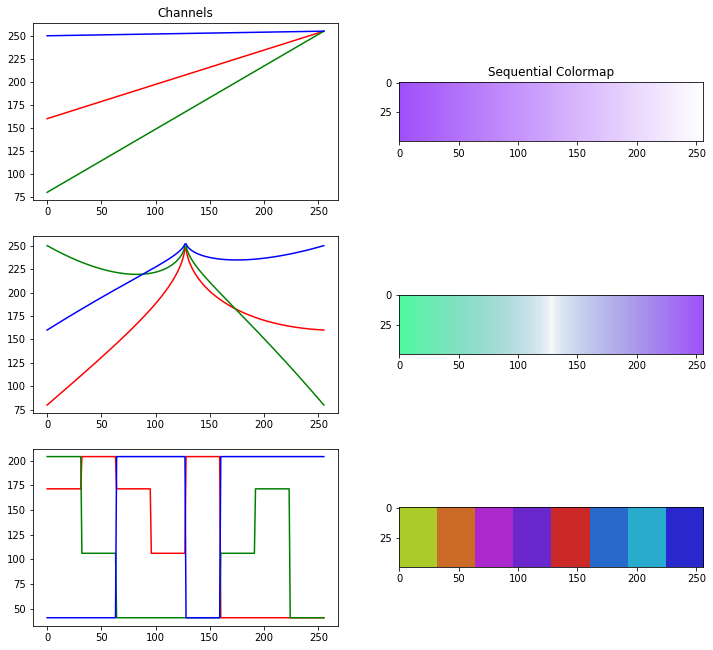

In [263]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import rgb_to_hsv,hsv_to_rgb


#sequential color map via hsv scaling
seq_map = np.ones((256,3))
seq_map[...,0] = np.linspace(160,255,256)
seq_map[...,1] = np.linspace(80,255,256)
seq_map[...,2] = np.linspace(250,255,256)

div_map = np.ones((256,3))
c0 = np.array([160,80,250])
c1 = np.array([80,250,160])
white = np.array([255,255,255])
div_map = np.array([(a*c0+(1.0-a)*c1)*abs(2*a-1)**(1/2) + white*(1.0 - abs(2*a-1)**(1/2)) for i,a in enumerate(np.linspace(0,1,256))])


#generate random color values with minimal given distance
num_colors = 8
colors     = np.random.permutation(np.linspace(0,1,16))[:num_colors]
qual_map   = np.ones((256,3))*np.repeat(colors,256//num_colors,axis=0)[:,np.newaxis]
qual_map[...,1] = 0.8
qual_map[...,2] = 0.8
qual_map = hsv_to_rgb(qual_map)*255

# PLOTTING

def get_bar(cmap):
    return np.repeat(cmap[np.newaxis,...],50,axis=0).astype(np.uint8)

def plot(cmap):
    plt.plot(cmap[:,0],'red')
    plt.plot(cmap[:,1],'green')
    plt.plot(cmap[:,2],'blue')
    
plt.figure(figsize=(12, 15))

plt.subplot(4,2,1)
plt.title("Channels")
plot(seq_map)
plt.subplot(4,2,2)
plt.title("Sequential Colormap")
plt.imshow(get_bar(seq_map),vmin=0,vmax=255)

plt.subplot(4,2,3)
plot(div_map)
plt.subplot(4,2,4)
plt.imshow(get_bar(div_map),vmin=0,vmax=255)

plt.subplot(4,2,5)
plot(qual_map)
plt.subplot(4,2,6)
plt.imshow(get_bar(qual_map),vmin=0,vmax=255)


plt.show()


### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} = \gamma g + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

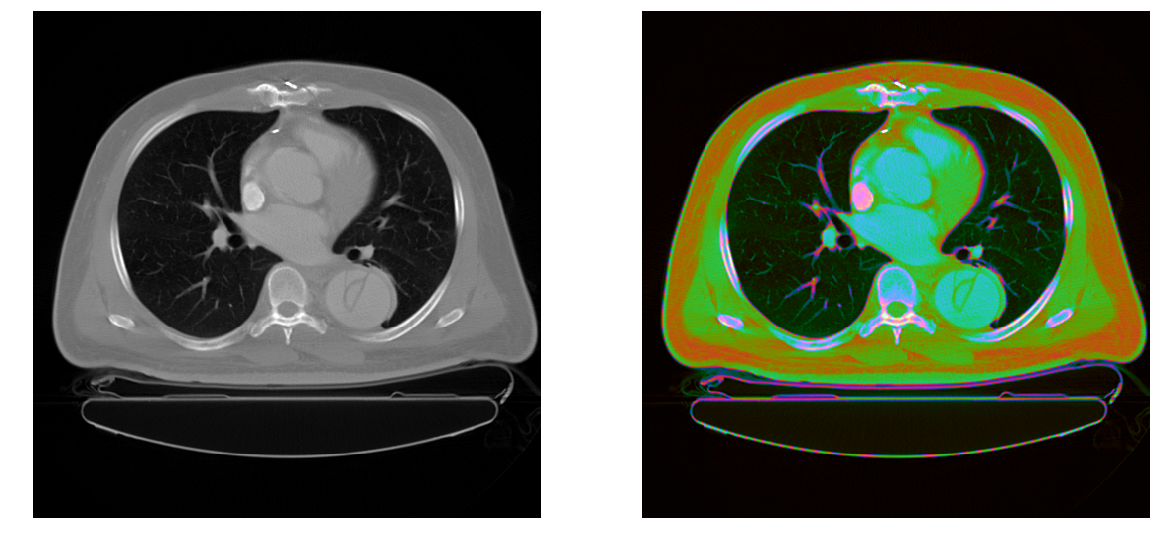

In [266]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1.2
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: np.ndarray of shape (256,3)
        The cube helix color map.
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        g     = i/255
        theta = 2*np.pi*((start_color/3.0)+rotations*g)
        a     = (gamma*hue*g*(1-gamma*g))/2.0
        
        lookup_table[i] = gamma*g+a*m.dot(np.array([np.cos(theta),np.sin(theta)]))
        
        
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Parameters:
        img: np.ndarray
            The image (ndim=2)
        lookup_table: np.ndarray
            The lookup table (shape=(256,3))
    Return:
        The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

The human visual systems concept of luminance is not directly proportional to the sum of the rgb components of a color. If we use a colormap like Jet a human observer may misinterpret the image as the percieved luminance at some random positions in the Jet spectrum has spikes. These positions are therefore visually emphasised. There are also colors which are different in tone but have the same luminance which may also lead to confusion.
Colormaps like the CubeHelix on the other hand has a linearily increasing luminance profile. 
Different colors always have different luminance.